<a href="https://colab.research.google.com/github/rishi-analytics/ESG-Data-Analysis/blob/main/ESG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ESG Data Analysis Project**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/SP 500 ESG Risk Ratings.csv", sep=',')

In [ ]:
df

Symbol                      Name  \
0     ENPH      Enphase Energy, Inc.   
1      EMN  Eastman Chemical Company   
2      DPZ       Domino's Pizza Inc.   
3      DAY            Dayforce, Inc.   
4      DVA               Davita Inc.   
..     ...                       ...   
498    ACN             Accenture Plc   
499   ABBV               Abbvie Inc.   
500    ABT       Abbott Laboratories   
501    AOS    A.O. Smith Corporation   
502    MMM                3m Company   

                                               Address             Sector  \
0    47281 Bayside Parkway\nFremont, CA 94538\nUnit...         Technology   
1    200 South Wilcox Drive\nKingsport, TN 37662\nU...    Basic Materials   
2    30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...  Consumer Cyclical   
3    3311 East Old Shakopee Road\nMinneapolis, MN 5...         Technology   
4    2000 16th Street\nDenver, CO 80202\nUnited States         Healthcare   
..                                                 ...                ...   
498  1 Grand Canal Square\nGrand Canal Harbour\nDub...         Technology   
499  1 North Waukegan Road\nNorth Chicago, IL 60064...         Healthcare   
500  100 Abbott Park Road\nAbbott Park\nNorth Chica...         Healthcare   
501  11270 West Park Place\nSuite 170 PO Box 245008...        Industrials   
502  3M Center\nSaint Paul, MN 55144-1000\nUnited S...        Industrials   

                            Industry Full Time Employees  \
0                              Solar               3,157   
1                Specialty Chemicals              14,000   
2                        Restaurants               6,500   
3             Software - Application               9,084   
4            Medical Care Facilities              70,000   
..                               ...                 ...   
498  Information Technology Services             742,000   
499     Drug Manufacturers - General              50,000   
500                  Medical Devices             114,000   
501   Specialty Industrial Machinery              12,000   
502                    Conglomerates              85,000   

                                           Description  Total ESG Risk score  \
0    Enphase Energy, Inc., together with its subsid...                   NaN   
1    Eastman Chemical Company operates as a special...                  25.3   
2    Domino's Pizza, Inc., through its subsidiaries...                  29.2   
3    Dayforce Inc., together with its subsidiaries,...                   NaN   
4    DaVita Inc. provides kidney dialysis services ...                  22.6   
..                                                 ...                   ...   
498  Accenture plc, a professional services company...                   9.8   
499  AbbVie Inc. discovers, develops, manufactures,...                  29.9   
500  Abbott Laboratories, together with its subsidi...                  24.8   
501  A. O. Smith Corporation manufactures and marke...                  25.4   
502  3M Company provides diversified technology ser...                  37.3   

     Environment Risk Score  Governance Risk Score  Social Risk Score  \
0                       NaN                    NaN                NaN   
1                      12.8                    6.6                5.8   
2                      10.6                    6.3               12.2   
3                       NaN                    NaN                NaN   
4                       0.1                    8.4               14.1   
..                      ...                    ...                ...   
498                     0.8                    4.4                4.6   
499                     2.4                   10.4               17.2   
500                     2.3                    8.3               14.2   
501                     7.2                    6.4               11.9   
502                    17.2                    6.5               13.6   

                 Controversy Level  Con

In [ ]:
df.shape

(503, 15)

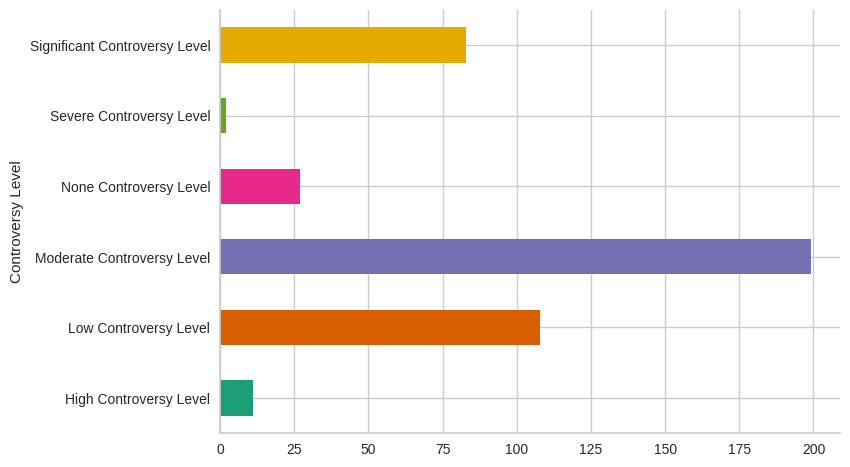

In [ ]:
# @title Controversy Level

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Controversy Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could 

In [ ]:
df.head()

Symbol                      Name  \
0   ENPH      Enphase Energy, Inc.   
1    EMN  Eastman Chemical Company   
2    DPZ       Domino's Pizza Inc.   
3    DAY            Dayforce, Inc.   
4    DVA               Davita Inc.   

                                             Address             Sector  \
0  47281 Bayside Parkway\nFremont, CA 94538\nUnit...         Technology   
1  200 South Wilcox Drive\nKingsport, TN 37662\nU...    Basic Materials   
2  30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...  Consumer Cyclical   
3  3311 East Old Shakopee Road\nMinneapolis, MN 5...         Technology   
4  2000 16th Street\nDenver, CO 80202\nUnited States         Healthcare   

                  Industry Full Time Employees  \
0                    Solar               3,157   
1      Specialty Chemicals              14,000   
2              Restaurants               6,500   
3   Software - Application               9,084   
4  Medical Care Facilities              70,000   

                                         Description  Total ESG Risk score  \
0  Enphase Energy, Inc., together with its subsid...                   NaN   
1  Eastman Chemical Company operates as a special...                  25.3   
2  Domino's Pizza, Inc., through its subsidiaries...                  29.2   
3  Dayforce Inc., together with its subsidiaries,...                   NaN   
4  DaVita Inc. provides kidney dialysis services ...                  22.6   

   Environment Risk Score  Governance Risk Score  Social Risk Score  \
0                     NaN                    NaN                NaN   
1                    12.8                    6.6                5.8   
2                    10.6                    6.3               12.2   
3                     NaN                    NaN                NaN   
4                     0.1                    8.4               14.1   

            Controversy Level  Controversy Score ESG Risk Percentile  \
0                         NaN                NaN                 NaN   
1  Moderate Controversy Level                2.0     50th percentile   
2  Moderate Controversy Level                2.0     66th percentile   
3                         NaN                NaN                 NaN   
4  Moderate Controversy Level                2.0     38th percentile   

  ESG Risk Level  
0            NaN  
1         Medium  
2         Medium  
3            NaN  
4         Medium


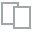
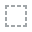
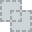
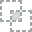
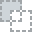
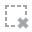
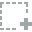
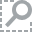
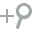
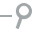
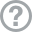
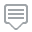
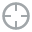
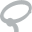
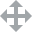
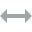
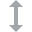
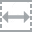
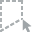
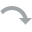
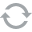
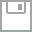
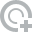
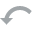
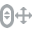
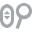
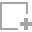
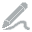
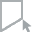
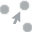
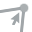
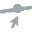

In [ ]:
plot(df)

As seen in the stats, there are significant amount of missing values. The missing values primarily affect key ESG-related columns like Total ESG Risk score, Environment Risk Score, Governance Risk Score, Social Risk Score, and Controversy Score, with around 14.51% missing across most of them. The Controversy Score has the highest percentage of missing data at 19.88%.

In [ ]:
# Remove commas from 'Full Time Employees' and convert to numeric
df['Full Time Employees'] = df['Full Time Employees'].str.replace(',', '').astype(float)

In [ ]:
# One-hot encode categorical variables
categorical_columns = ['Controversy Level', 'ESG Risk Percentile', 'ESG Risk Level']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
# Convert 'Full Time Employees' to string, handle NaN, remove commas, and then convert to float
df['Full Time Employees'] = df['Full Time Employees'].astype(str).str.replace(',', '')
df['Full Time Employees'] = pd.to_numeric(df['Full Time Employees'], errors='coerce')  # Convert to numeric

In [ ]:
df.head(20)

Symbol                                          Name  \
0    ENPH                          Enphase Energy, Inc.   
1     EMN                      Eastman Chemical Company   
2     DPZ                           Domino's Pizza Inc.   
3     DAY                                Dayforce, Inc.   
4     DVA                                   Davita Inc.   
5     DRI                      Darden Restaurants, Inc.   
6     ZTS                                   Zoetis Inc.   
7     ZBH                  Zimmer Biomet Holdings, Inc.   
8    ZBRA                Zebra Technologies Corporation   
9     YUM                             Yum! Brands, Inc.   
10    XYL                                     Xylem Inc   
11    XEL                             Xcel Energy, Inc.   
12   WYNN                              Wynn Resorts Ltd   
13    WTW  Willis Towers Watson Public Limited Companys   
14    WMB                       Williams Companies Inc.   
15     WY                          Weyerhaeuser Company   
16    WRK                              Westrock Company   
17    WDC                         Western Digital Corp.   
18    WST            West Pharmaceutical Services, Inc.   
19   WELL                                Welltower Inc.   

                                              Address              Sector  \
0   47281 Bayside Parkway\nFremont, CA 94538\nUnit...          Technology   
1   200 South Wilcox Drive\nKingsport, TN 37662\nU...     Basic Materials   
2   30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...   Consumer Cyclical   
3   3311 East Old Shakopee Road\nMinneapolis, MN 5...          Technology   
4   2000 16th Street\nDenver, CO 80202\nUnited States          Healthcare   
5   1000 Darden Center Drive\nOrlando, FL 32837\nU...   Consumer Cyclical   
6   10 Sylvan Way\nParsippany, NJ 07054\nUnited St...          Healthcare   
7   345 East Main Street\nWarsaw, IN 46580\nUnited...          Healthcare   
8   3 Overlook Point\nLincolnshire, IL 60069\nUnit...          Technology   
9   1441 Gardiner Lane\nLouisville, KY 40213\nUnit...   Consumer Cyclical   
10  300 Water Street SE\nSuite 200\nWashington, DC...         Industrials   
11  414 Nicollet Mall\nMinneapolis, MN 55401\nUnit...           Utilities   
12  3131 Las Vegas Boulevard South\nLas Vegas, NV ...   Consumer Cyclical   
13   51 Lime Street\nLondon, EC3M 7DQ\nUnited Kingdom  Financial Services   
14  One Williams Center\nTulsa, OK 74172\nUnited S...              Energy   
15  220 Occidental Avenue South\nSeattle, WA 98104...         Real Estate   
16  1000 Abernathy Road NE\nAtlanta, GA 30328\nUni...   Consumer Cyclical   
17  5601 Great Oaks Parkway\nGreat Oaks\nSan Jose,...          Technology   
18  530 Herman O. West Drive\nExton, PA 19341-1147...          Healthcare   
19  4500 Dorr Street\nToledo, OH 43615-4040\nUnite...         Real Estate   

                                    Industry Full Time Employees  \
0                                      Solar               3,157   
1                        Specialty Chemicals              14,000   
2                                Restaurants               6,500   
3                     Software - Application               9,084   
4                    Medical Care Facilities              70,000   
5                                Restaurants             187,384   
6   Drug Manufacturers - Specialty & Generic              14,100   
7                            Medical Devices              18,000   
8                    Communication Equipment               9,750   
9                                Restaurants              35,000   
10            Specialty Industrial Machinery              23,000   
11            Utilities - Regulated Electric              11,311   
12                         Resorts & Casinos              27,800   
13                         Insurance Brokers              48,000   
14                       Oil & Gas Midstream               5,601   
15                          REIT - Specialty             

In [ ]:
df.describe()

Total ESG Risk score  Environment Risk Score  Governance Risk Score  \
count            430.000000              430.000000             430.000000   
mean              21.533721                5.739767               6.725116   
std                6.889176                5.092421               2.208085   
min                7.100000                0.000000               3.000000   
25%               16.400000                1.800000               5.300000   
50%               21.050000                4.050000               6.100000   
75%               26.000000                8.950000               7.675000   
max               41.700000               25.000000              19.400000   

       Social Risk Score  Controversy Score  
count         430.000000         403.000000  
mean            9.070465           2.007444  
std             3.657924           0.793283  
min             0.800000           1.000000  
25%             6.700000           1.000000  
50%             8.900000           2.000000  
75%            11.200000           2.000000  
max            22.500000           5.000000

                    Sector  Total ESG Risk score
0          Basic Materials             26.715789
1   Communication Services             19.414286
2        Consumer Cyclical             19.227451
3       Consumer Defensive             25.445455
4                   Energy             32.335000
5       Financial Services             21.262903
6               Healthcare             20.730000
7              Industrials             24.036842
8              Real Estate             13.461905
9               Technology             17.047826
10               Utilities             26.907407


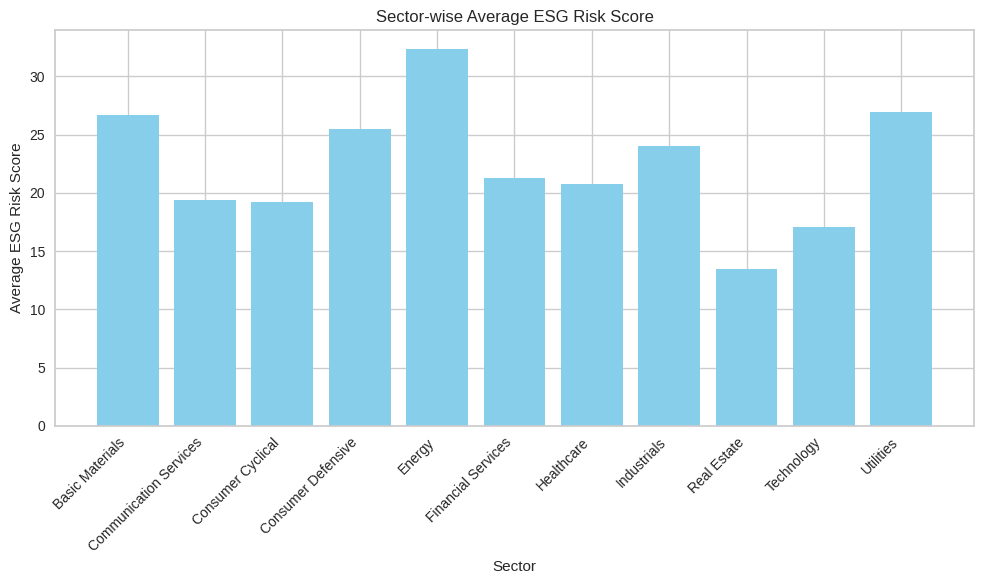

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop rows with missing values in any column
df_cleaned = df.dropna()

# Step 2: Calculate the average ESG score sector-wise
sector_avg_esg = df_cleaned.groupby('Sector')['Total ESG Risk score'].mean().reset_index()

# Display the calculated sector-wise average ESG risk score
print(sector_avg_esg)

# Step 3: Plot a graph for sector-wise ESG Risk Analysis
plt.figure(figsize=(10,6))
plt.bar(sector_avg_esg['Sector'], sector_avg_esg['Total ESG Risk score'], color='skyblue')
plt.title('Sector-wise Average ESG Risk Score')
plt.xlabel('Sector')
plt.ylabel('Average ESG Risk Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

## Sector-wise ESG Risk Analysis Code

This code analyzes the average ESG Risk Score across different sectors in the dataset and visualizes the results.

1. **Importing Libraries**: The code begins by importing the `pandas` library for data manipulation and `matplotlib.pyplot` for creating visualizations.

2. **Cleaning Data**: It drops any rows in the dataframe (`df`) that contain missing values in any column, resulting in a cleaned dataframe (`df_cleaned`).

3. **Calculating Sector-wise Average ESG Score**: The code groups the cleaned dataframe by the 'Sector' column and calculates the mean of the 'Total ESG Risk score' for each sector. The results are reset into a new dataframe (`sector_avg_esg`).

4. **Displaying Results**: It prints the sector-wise average ESG risk scores to the console for review.

5. **Plotting the Results**: The code creates a bar plot to visualize the average ESG Risk Score for each sector:
   - A figure is initialized with a specified size.
   - A bar chart is created with sectors on the x-axis and average ESG Risk Scores on the y-axis.
   - The plot is customized with titles and labels, and the x-axis labels are rotated for better readability.
   - Finally, the plot is displayed.

The output is a bar chart that allows for a quick comparison of average ESG Risk Scores across different sectors, providing valuable insights into how ESG risks vary by sector.

No data to create a word cloud for ESG Risk Level: nan.


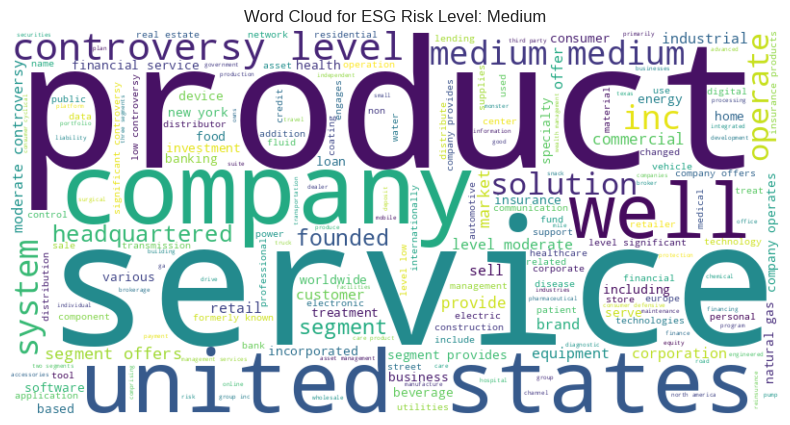

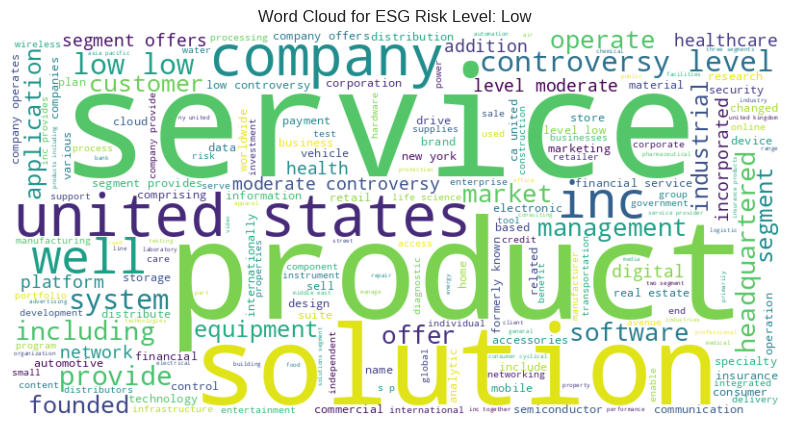

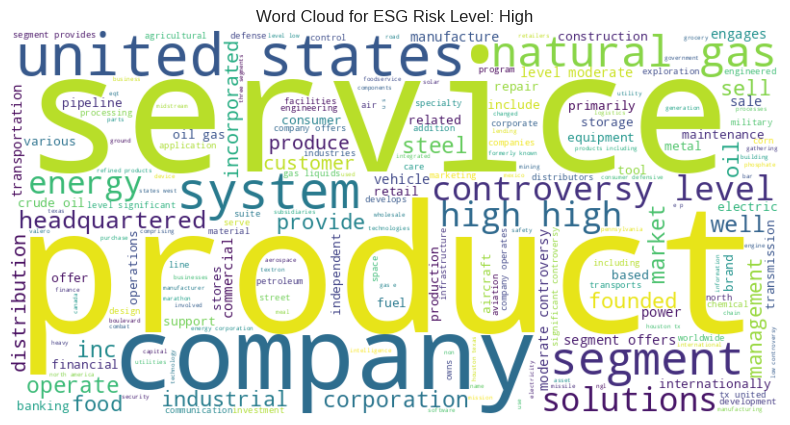

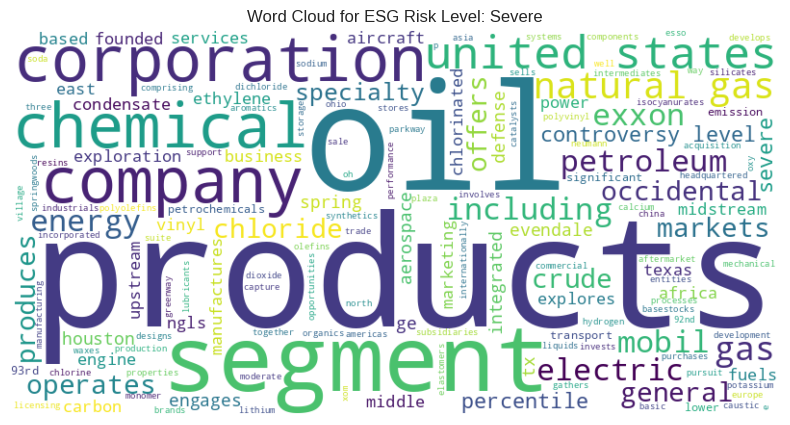

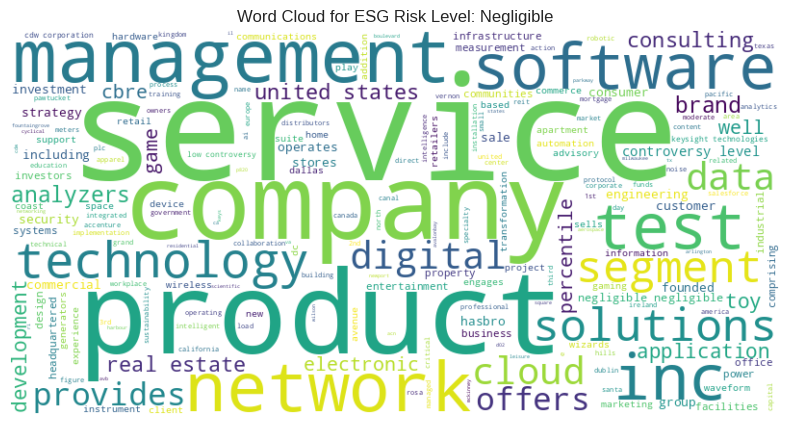

In [ ]:
# Define string_cols as all columns of type object (i.e., string columns)
string_cols = df.select_dtypes(include=['object']).columns

for col in string_cols:
    df[col] = df[col].str.lower()

# Get unique ESG Risk Levels
risk_levels = df['ESG Risk Level'].unique()

# Create a word cloud for each ESG Risk Level
for risk_level in risk_levels:
    # Filter the dataframe for the current ESG Risk Level
    filtered_df = df[df['ESG Risk Level'] == risk_level]

    # Continue to next iteration if filtered_df does not have any rows
    if filtered_df.empty:
        print(f"No data to create a word cloud for ESG Risk Level: {risk_level}.")
        continue

    # Combine text from the specified columns into a single string
    text = ' '.join(filtered_df[col].dropna().str.cat(sep=' ') for col in string_cols if col in filtered_df.columns)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for ESG Risk Level: {risk_level.capitalize()}')
    plt.show()

## Word Cloud Generation Code

This code generates word clouds for each unique ESG Risk Level in the dataset.

1. **Importing Libraries**: The code imports the necessary libraries, including `pandas` for data manipulation, `matplotlib.pyplot` for plotting, and `WordCloud` for generating word clouds.

2. **Identifying String Columns**: It defines `string_cols` as all columns in the dataframe that contain string data (object type).

3. **Lowercasing Text**: It converts all text in the string columns to lowercase to ensure uniformity for word cloud generation.

4. **Getting Unique ESG Risk Levels**: The code retrieves the unique values from the 'ESG Risk Level' column to iterate through them.

5. **Generating Word Clouds**: For each ESG Risk Level:
   - It filters the dataframe to include only rows corresponding to the current risk level.
   - It combines the text from the relevant string columns into a single string.
   - A word cloud is generated using this combined text, and it is displayed using Matplotlib.

The output is a series of word clouds, each representing the most frequent words associated with the specific ESG Risk Level, providing insights into the language and themes prevalent within each risk category.